In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
def build_model(my_learning_rate):
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


In [4]:
def train_model(model, feature, label, epochs, batch_size):
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias, epochs, rmse

In [7]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])


In [8]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
12/12 [==============================] - 0s 1ms/step - loss: 382.8392 - root_mean_squared_error: 19.5663
Epoch 2/50
12/12 [==============================] - 0s 1ms/step - loss: 231.2008 - root_mean_squared_error: 15.2053
Epoch 3/50
12/12 [==============================] - 0s 1ms/step - loss: 140.5504 - root_mean_squared_error: 11.8554
Epoch 4/50
12/12 [==============================] - 0s 1ms/step - loss: 77.2915 - root_mean_squared_error: 8.7916
Epoch 5/50
12/12 [==============================] - 0s 1ms/step - loss: 35.5779 - root_mean_squared_error: 5.9647
Epoch 6/50
12/12 [==============================] - 0s 1ms/step - loss: 12.8838 - root_mean_squared_error: 3.5894
Epoch 7/50
12/12 [==============================] - 0s 1ms/step - loss: 3.6678 - root_mean_squared_error: 1.9151
Epoch 8/50
12/12 [==============================] - 0s 1ms/step - loss: 1.4358 - root_mean_squared_error: 1.1983
Epoch 9/50
12/12 [==============================] - 0s 1ms/step - loss: 1.2258 - roo

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


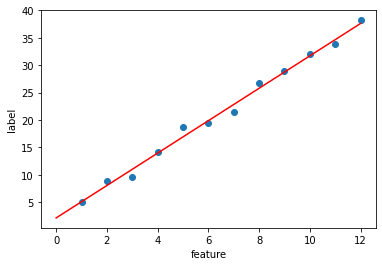

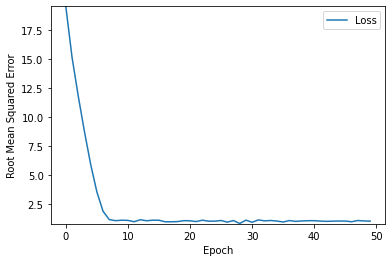

In [17]:
learning_rate=0.05
epochs=50
my_batch_size=1

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)